# DATA SCIENCE AND BUSINESS ANALYSIS TASKS

### TASK:- PREDICTION USING SUPERVISED ML

#### Instructions Given:-Predict the percentage of an student based on the no. of study hours. 
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool 


# Author:- Divyansh Sankhla

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##### Step 1:- Importing the data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")

#### Step 2:- Data preprocessing

In [5]:
data.shape

(25, 2)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Step 3:- Plotting the distribution of scores

Text(0, 0.5, '% Scores')

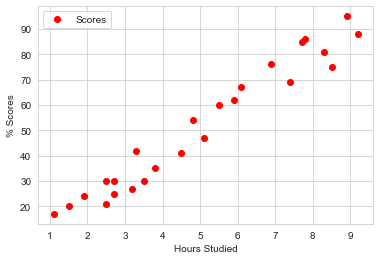

In [14]:
sns.set_style("whitegrid")
data.plot(x='Hours',y='Scores',style='ro')
plt.xlabel('Hours Studied')
plt.ylabel('% Scores')

#### Step 4:- Finding the correlation b/w the attributes- by pearson method using .corr()

In [15]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

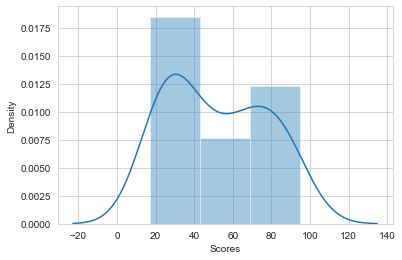

In [17]:
sns.distplot(data['Scores'])

c:\users\divya\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

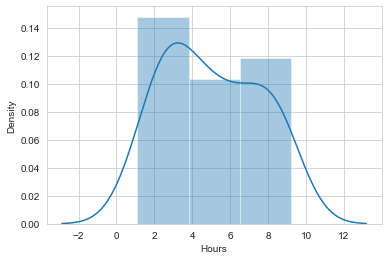

In [18]:
sns.distplot(data['Hours'])

#### Step 5:- Prepare the Data- Place values of hours in x and values of scores in y

In [19]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Step 6:- Make test and train set on the data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [24]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [25]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [26]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

#### Step 7:- Train the ML Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training of the model is Complete")

Training of the model is Complete


#### Step 8:- Model Visualization

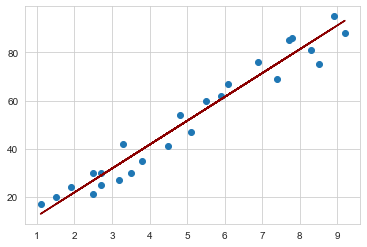

In [29]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x,y)
plt.plot(x, line, color = "darkRed")
plt.show()

#### Step 9:- Predicting the result from ML LR Model

In [33]:
y_pred=regressor.predict(x_test)
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Question:-What will be predicted score if a student studies for 9.25 hrs/ day? 

In [34]:
hours = 9.25
my_pred = regressor.predict([[hours]])
print(f"No. of Hours = {hours}")
print(f"Predicted Score = {my_pred[0]}")

No. of Hours = 9.25
Predicted Score = 93.69173248737535
